## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  31.561422   423.296627  0.821013  7.326649   348.717998
1  65.328357  1190.215677  0.399585  1.888451   480.055790
2  22.634690  1317.699415  0.376743  8.306338   496.824212
3  61.683367  1635.403874  0.694648  9.367219  1137.675008
4  72.384423   418.436882  0.448459  6.225816   200.873127


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0053663	total: 70.7ms	remaining: 1m 10s
1:	learn: 0.9959773	total: 71.5ms	remaining: 35.7s
2:	learn: 0.9860892	total: 72.1ms	remaining: 23.9s
3:	learn: 0.9756917	total: 72.6ms	remaining: 18.1s
4:	learn: 0.9612816	total: 73ms	remaining: 14.5s
5:	learn: 0.9484493	total: 73.6ms	remaining: 12.2s
6:	learn: 0.9349604	total: 74.1ms	remaining: 10.5s
7:	learn: 0.9250576	total: 74.6ms	remaining: 9.25s
8:	learn: 0.9119508	total: 75.1ms	remaining: 8.27s
9:	learn: 0.9001767	total: 75.6ms	remaining: 7.48s
10:	learn: 0.8882760	total: 76ms	remaining: 6.83s
11:	learn: 0.8748459	total: 76.5ms	remaining: 6.3s
12:	learn: 0.8636452	total: 77ms	remaining: 5.84s
13:	learn: 0.8527681	total: 77.4ms	remaining: 5.45s
14:	learn: 0.8410863	total: 77.8ms	remaining: 5.11s
15:	learn: 0.8318711	total: 78.3ms	remaining: 4.81s
16:	learn: 0.8212671	total: 78.7ms	remaining: 4.55s
17:	learn: 0.8116690	total: 79.3ms	remaining: 4.32s
18:	learn: 0.8029770	total: 79.7ms	remaining: 4.11

90:	learn: 0.3623956	total: 109ms	remaining: 1.09s
91:	learn: 0.3595036	total: 109ms	remaining: 1.08s
92:	learn: 0.3557713	total: 110ms	remaining: 1.07s
93:	learn: 0.3521311	total: 110ms	remaining: 1.06s
94:	learn: 0.3477486	total: 111ms	remaining: 1.05s
95:	learn: 0.3442300	total: 111ms	remaining: 1.04s
96:	learn: 0.3403088	total: 111ms	remaining: 1.03s
97:	learn: 0.3369017	total: 112ms	remaining: 1.03s
98:	learn: 0.3345813	total: 112ms	remaining: 1.02s
99:	learn: 0.3306955	total: 112ms	remaining: 1.01s
100:	learn: 0.3267951	total: 113ms	remaining: 1s
101:	learn: 0.3233475	total: 113ms	remaining: 994ms
102:	learn: 0.3199166	total: 113ms	remaining: 987ms
103:	learn: 0.3168294	total: 114ms	remaining: 980ms
104:	learn: 0.3142055	total: 114ms	remaining: 973ms
105:	learn: 0.3106237	total: 114ms	remaining: 966ms
106:	learn: 0.3079367	total: 115ms	remaining: 959ms
107:	learn: 0.3049203	total: 115ms	remaining: 951ms
108:	learn: 0.3014181	total: 116ms	remaining: 945ms
109:	learn: 0.2989224	tot

273:	learn: 0.0829501	total: 186ms	remaining: 493ms
274:	learn: 0.0825054	total: 187ms	remaining: 492ms
275:	learn: 0.0819637	total: 187ms	remaining: 491ms
276:	learn: 0.0816168	total: 187ms	remaining: 489ms
277:	learn: 0.0812303	total: 188ms	remaining: 488ms
278:	learn: 0.0808997	total: 188ms	remaining: 487ms
279:	learn: 0.0804562	total: 189ms	remaining: 485ms
280:	learn: 0.0800349	total: 189ms	remaining: 483ms
281:	learn: 0.0795097	total: 189ms	remaining: 482ms
282:	learn: 0.0790751	total: 190ms	remaining: 481ms
283:	learn: 0.0785576	total: 190ms	remaining: 479ms
284:	learn: 0.0782267	total: 191ms	remaining: 478ms
285:	learn: 0.0779052	total: 191ms	remaining: 477ms
286:	learn: 0.0775098	total: 191ms	remaining: 475ms
287:	learn: 0.0769838	total: 192ms	remaining: 474ms
288:	learn: 0.0764759	total: 192ms	remaining: 473ms
289:	learn: 0.0761604	total: 193ms	remaining: 471ms
290:	learn: 0.0756902	total: 193ms	remaining: 470ms
291:	learn: 0.0753661	total: 193ms	remaining: 469ms
292:	learn: 

521:	learn: 0.0276570	total: 290ms	remaining: 266ms
522:	learn: 0.0274903	total: 291ms	remaining: 265ms
523:	learn: 0.0273611	total: 291ms	remaining: 264ms
524:	learn: 0.0273033	total: 292ms	remaining: 264ms
525:	learn: 0.0271050	total: 292ms	remaining: 263ms
526:	learn: 0.0270426	total: 292ms	remaining: 262ms
527:	learn: 0.0269658	total: 293ms	remaining: 262ms
528:	learn: 0.0268059	total: 293ms	remaining: 261ms
529:	learn: 0.0266940	total: 293ms	remaining: 260ms
530:	learn: 0.0266389	total: 294ms	remaining: 260ms
531:	learn: 0.0265300	total: 294ms	remaining: 259ms
532:	learn: 0.0264516	total: 295ms	remaining: 258ms
533:	learn: 0.0263947	total: 295ms	remaining: 258ms
534:	learn: 0.0262059	total: 296ms	remaining: 257ms
535:	learn: 0.0261759	total: 296ms	remaining: 256ms
536:	learn: 0.0260900	total: 297ms	remaining: 256ms
537:	learn: 0.0259624	total: 297ms	remaining: 255ms
538:	learn: 0.0258592	total: 298ms	remaining: 255ms
539:	learn: 0.0257213	total: 298ms	remaining: 254ms
540:	learn: 

702:	learn: 0.0148840	total: 367ms	remaining: 155ms
703:	learn: 0.0148544	total: 368ms	remaining: 155ms
704:	learn: 0.0148256	total: 368ms	remaining: 154ms
705:	learn: 0.0148135	total: 368ms	remaining: 153ms
706:	learn: 0.0147361	total: 369ms	remaining: 153ms
707:	learn: 0.0147242	total: 369ms	remaining: 152ms
708:	learn: 0.0146964	total: 370ms	remaining: 152ms
709:	learn: 0.0146211	total: 370ms	remaining: 151ms
710:	learn: 0.0146095	total: 371ms	remaining: 151ms
711:	learn: 0.0145993	total: 371ms	remaining: 150ms
712:	learn: 0.0145766	total: 371ms	remaining: 149ms
713:	learn: 0.0145666	total: 371ms	remaining: 149ms
714:	learn: 0.0145101	total: 372ms	remaining: 148ms
715:	learn: 0.0144512	total: 372ms	remaining: 148ms
716:	learn: 0.0143868	total: 373ms	remaining: 147ms
717:	learn: 0.0143290	total: 373ms	remaining: 147ms
718:	learn: 0.0143069	total: 374ms	remaining: 146ms
719:	learn: 0.0142484	total: 374ms	remaining: 145ms
720:	learn: 0.0141772	total: 374ms	remaining: 145ms
721:	learn: 

950:	learn: 0.0069988	total: 472ms	remaining: 24.3ms
951:	learn: 0.0069719	total: 473ms	remaining: 23.8ms
952:	learn: 0.0069450	total: 473ms	remaining: 23.3ms
953:	learn: 0.0069392	total: 474ms	remaining: 22.8ms
954:	learn: 0.0069336	total: 474ms	remaining: 22.3ms
955:	learn: 0.0068985	total: 474ms	remaining: 21.8ms
956:	learn: 0.0068942	total: 475ms	remaining: 21.3ms
957:	learn: 0.0068690	total: 475ms	remaining: 20.8ms
958:	learn: 0.0068648	total: 476ms	remaining: 20.3ms
959:	learn: 0.0068401	total: 476ms	remaining: 19.8ms
960:	learn: 0.0068359	total: 477ms	remaining: 19.3ms
961:	learn: 0.0068304	total: 477ms	remaining: 18.8ms
962:	learn: 0.0068060	total: 477ms	remaining: 18.3ms
963:	learn: 0.0068019	total: 478ms	remaining: 17.8ms
964:	learn: 0.0067744	total: 478ms	remaining: 17.3ms
965:	learn: 0.0067489	total: 478ms	remaining: 16.8ms
966:	learn: 0.0067315	total: 479ms	remaining: 16.3ms
967:	learn: 0.0067065	total: 479ms	remaining: 15.8ms
968:	learn: 0.0066767	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

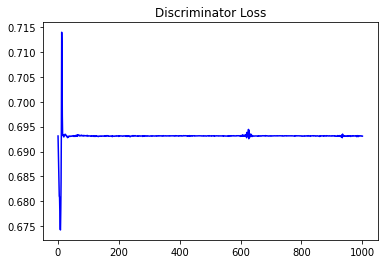

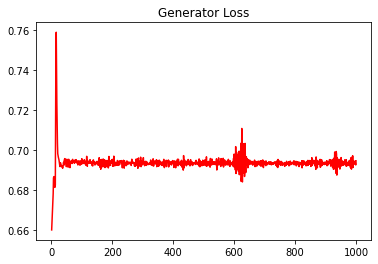

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.016206752209672545


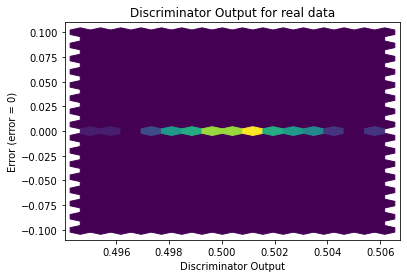

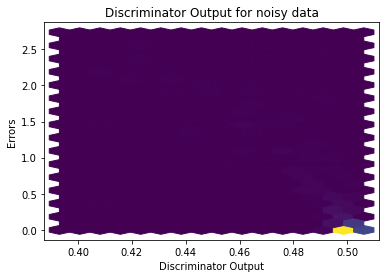

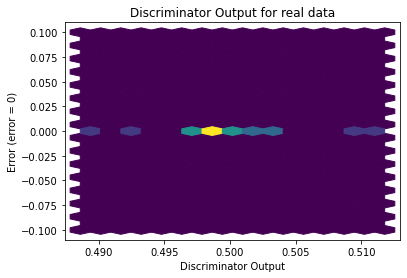

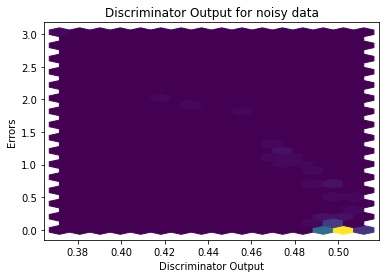

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


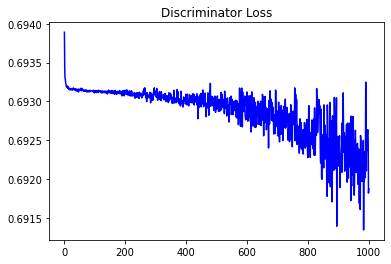

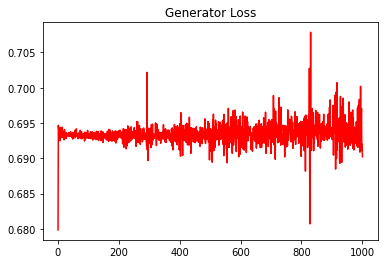

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03489040430069084


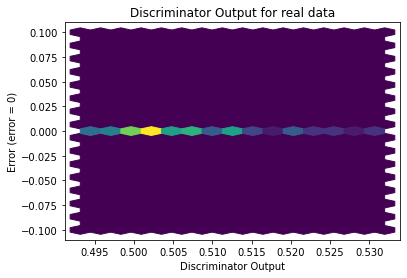

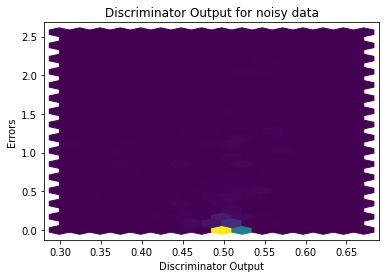

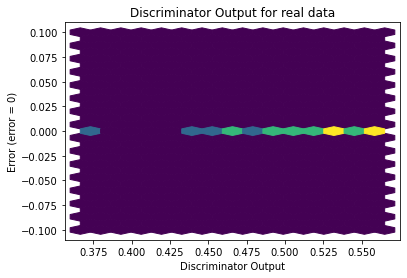

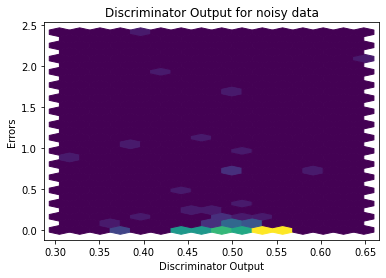

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
